 # Import Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
from cmdstanpy import CmdStanModel
import arviz as az

import matplotlib.pyplot as plt

In [3]:
with open("fecondità_finale", "rb") as f:
    dataset=pd.read_csv(f)
    
dataset = dataset.sort_values(by=['Territorio', 'TIME'])
dataset

,Territorio,TIME,età.media.delle.madri.al.parto,età.media.dei.padri.alla.nascita.del.figlio,tasso.di.fecondità.totale,tasso.di.inattività.dei.maschi,tasso.di.inattività.delle.femmine,tasso.di.inattività.totale,tasso.di.occupazione.dei.maschi,tasso.di.occupazione.delle.femmine,tasso.di.occupazione.totale
930,Agrigento,2011,30.94,34.80,1.37,42.911800,75.561168,59.924924,47.392418,19.828757,33.029603
931,Agrigento,2012,30.73,34.57,1.35,43.934839,74.366121,59.780301,45.282895,20.513632,32.385627
932,Agrigento,2013,31.09,34.78,1.27,46.361107,73.567265,60.518499,43.469198,19.889053,31.198656
933,Agrigento,2014,30.99,35.06,1.33,47.098738,72.427712,60.272133,39.673492,20.296449,29.595648
934,Agrigento,2015,31.14,34.97,1.27,45.169256,75.916130,61.148536,40.057236,18.153835,28.674135
...,...,...,...,...,...,...,...,...,...,...,...
625,Viterbo,2016,31.99,35.76,1.23,39.518267,60.635768,50.408778,52.769263,32.263986,42.194134
626,Viterbo,2017,32.17,35.73,1.16,41.158020,61.241767,51.511845,51.680541,33.283508,42.195912
627,Viterbo,2018,32.05,35.64,1.20,42.945825,61.820030,52.659989,50.508888,33.458828,41.733539
628,Viterbo,2019,31.97,35.51,1.11,44.935350,63.118101,54.287825,49.777042,32.974065,41.133933


[[1.37 1.35 1.27 ... 1.29 1.24 1.26]
 [1.37 1.36 1.3  ... 1.22 1.17 1.15]
 [1.44 1.43 1.36 ... 1.24 1.21 1.21]
 ...
 [1.28 1.36 1.24 ... 1.29 1.25 1.3 ]
 [1.51 1.53 1.47 ... 1.39 1.33 1.34]
 [1.31 1.31 1.23 ... 1.2  1.11 1.09]]
(106, 10)


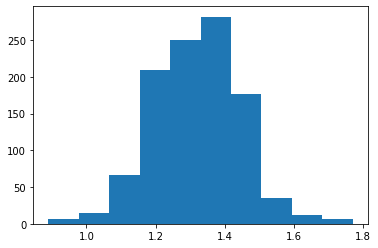

In [96]:
Y=np.array(dataset["tasso.di.fecondità.totale"])
y = []
y_tmp = np.zeros(10)
for prov in np.unique(dataset["Territorio"]):
    data_prov = dataset[dataset["Territorio"] == prov]
    y_tmp = np.array(data_prov["tasso.di.fecondità.totale"])
    y.append(y_tmp)
y = np.array(y)
print(y)
print(y.shape)
plt.hist(Y)    
plt.show()

In [38]:
# if you want to normalize the answer
#maxY=np.max(Y)
#minY=np.min(Y)
#Y=(Y-minY)/(maxY-minY)

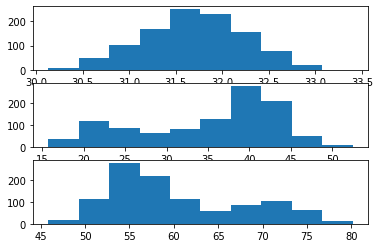

In [95]:
# mega matrix with the covariates, da normalizzare forse?
X1=np.array(dataset["età.media.delle.madri.al.parto"])
X2=np.array(dataset["tasso.di.occupazione.delle.femmine"])
X3=np.array(dataset["tasso.di.inattività.delle.femmine"])
# da valutare se vanno standardizzate
fig, axs = plt.subplots(3)
axs[0].hist(X1)
axs[1].hist(X2)
axs[2].hist(X3)
plt.show()

In [88]:
P = 3
X=np.ones((1060,P+1))
X[:,1]=X1
X[:,2]=X2
X[:,3]=X3
X=np.reshape(X,(106,10,P+1))
print(X)
X.shape


#X3=np.array(dataset["tasso.di.occupazione.totale"])
#X[:,1]=X3

[[[ 1.       30.94     34.8      33.029603]
  [ 1.       30.73     34.57     32.385627]
  [ 1.       31.09     34.78     31.198656]
  ...
  [ 1.       31.6      35.25     30.004547]
  [ 1.       31.54     35.35     31.142074]
  [ 1.       31.68     35.17     30.306778]]

 [[ 1.       30.8      34.84     46.27013 ]
  [ 1.       31.       34.99     46.565086]
  [ 1.       31.3      35.18     44.3959  ]
  ...
  [ 1.       31.59     35.51     46.205823]
  [ 1.       31.72     35.76     46.077288]
  [ 1.       31.76     35.63     44.499835]]

 [[ 1.       31.25     35.21     48.2398  ]
  [ 1.       31.37     35.25     48.547481]
  [ 1.       31.46     35.39     47.630386]
  ...
  [ 1.       32.26     35.69     48.115008]
  [ 1.       32.24     35.93     47.126603]
  [ 1.       32.29     35.8      46.690966]]

 ...

 [[ 1.       31.22     35.32     32.929587]
  [ 1.       31.18     35.34     30.230937]
  [ 1.       31.32     35.29     29.642365]
  ...
  [ 1.       31.54     35.46     33.3255

(106, 10, 4)

In [75]:
I= 106
T= 10
H= 10

In [54]:
with open("proximity_matrix", "rb") as f:
    W_raw=pd.read_csv(f)

In [55]:
W_raw=np.matrix(W_raw)

# Prepare data for model

In [56]:
for i in range(106):
  W_raw[i,i] = 0

W_raw=np.matrix(W_raw)
Wt = W_raw.transpose()
(Wt == W_raw).all()

True

In [59]:
# compute Qinv
one_vector = np.ones(shape = (I,1))
B = np.matmul(W_raw , one_vector)
A =  np.diagflat(np.array(B))
W_intermedia = A - W_raw


rho = 0.95 
Q = rho * W_intermedia  + (1-rho) * np.eye(I)
Qinv = np.linalg.inv(Q)
# Qinv.shape
W_intermedia.shape

(106, 106)

In [62]:
#Qinv must be positive definite
for i in range(I):
  for j in range(I):
    Qinv[j,i] = Qinv[i,j]

Qinv=np.matrix(Qinv)
Qinvt = Qinv.transpose()
print((Qinv == Qinvt).all())

#np.linalg.eig(Qinv)

True


In [90]:
mu_0 = np.zeros(P+1) #as in the paper
mu_w_1 = np.zeros(I) #as in the paper
sigma_0 = 1 #covariance matrix


data = {
    "I": I,
    "T": T,
    "P": P,
    "H": H,
    "y": y,
    "X": X,
    "mu_0": mu_0,
    "sigma_0": sigma_0,
    "mu_w_1": mu_w_1,
    "a_alpha": 3,
    "b_alpha": 2,
    "a_tau2": 3,
    "b_tau2": 3,
    "a_sigma2": 3,
    "b_sigma2": 2,
    "rho": 0.95,
    "a_xi": 1,
    "b_xi": 1,
    "inv_Q": Qinv
}

# Model

In [97]:
dp_mix_stan = """
data
{
    int I; // number of areal locations
    int T; // number of time steps
    int P; // number of covariates
    int H; // truncation of stick breaking construction dp
    
    array[I] vector[T] y; // value of interest
    array[I] matrix[T,P+1] X; // covariates matrices for each province
      
    // hyperpar vector of regressors
    vector[P+1] mu_0; 
    real        sigma_0;
    
    // mean of w_1 (random effect for every province at time 1)
    vector[I] mu_w_1;
    
    // alpha
    real a_alpha;
    real b_alpha;
    
    // tau^2
    real a_tau2;
    real b_tau2;
    
    // sigma^2
    real a_sigma2;
    real b_sigma2;
    
    // rho 
    real rho;
    
    //xis
    real a_xi;
    real b_xi;

    // Qinv
    matrix[I,I] inv_Q;
}

transformed data {
    matrix[I, I] L;
    L = cholesky_decompose(inv_Q);
}

parameters
{
    real<lower=0> alpha;
    real<lower=0> sigma2; 
    real<lower=0> tau2;  
    
    // autoregressive coefficient construction
    real<lower=0,upper=1> xi_constructor;
    
    // betas for the mixture of the dirichlet process
    array[H] vector[P+1] betas; 

    // for the construction of the dirichlet process
    vector<lower=0,upper=1>[H-1] vs;
    
    // for the random effect construction 
    array[T] vector[I] w_raw;
}

transformed parameters
{   
    // weights stick breaking construction
    simplex[H] omegas; 
    
    // sbc stuff
    vector[H-1] cumprod_one_mv;    
    cumprod_one_mv = exp(cumulative_sum(log1m(vs)));
    
    omegas[1] = vs[1];
    omegas[2:(H-1)] = vs[2:(H-1)] .* cumprod_one_mv[1:(H-2)];
    omegas[H] = cumprod_one_mv[H-1];
    
    // autoregressive coefficient of the random effects
    real xi = 2*xi_constructor-1;
    
    // random effects tmp
    matrix[I,T]                ws_tmp;
    
    ws_tmp[1:I,1] =  mu_w_1 + L*w_raw[1];
    
    for (t in 2:T)
        ws_tmp[1:I,t] = ws_tmp[1:I,t-1]*xi + L*w_raw[t]; 
    
    matrix[T,I]   ws = (ws_tmp)'; //otherwise I have to transpose in the for loop at each iteration
    
    // Stan wants std
    real sigma = sqrt(sigma2);
    real tau = sqrt(tau2);
}

model
{
    alpha  ~ gamma(a_alpha,b_alpha);
    sigma2 ~ inv_gamma(a_sigma2,b_sigma2);
    tau2   ~ inv_gamma(a_tau2,b_tau2);
    vs     ~ beta(1,alpha); 
    xi_constructor ~ beta(a_xi,b_xi);
    
    w_raw[1] ~ normal(0, tau); 
    
    for (t in 2:T)
        w_raw[t] ~ normal(0, tau);
    
    for (h in 1:H)
        betas[h] ~ normal(mu_0, sigma_0);
    
    vector[H] log_probs;
    
    for (i in 1:I) {
        
        for (h in 1:H) 
    
            log_probs[h] = log(omegas[h]) + normal_lpdf(y[i] | X[i]*betas[h] + ws[1:T,i], sigma);
        
        target += log_sum_exp(log_probs);
    }
}

generated quantities 
{   
    // vector of cluster allocations
    vector[I] s;
    
    // log likelihood for each areal location 
    vector[I] log_lik;
    
    array[I] vector[H] log_probs;
    
    for (i in 1:I) 
    {
        for (h in 1:H) 
            log_probs[i,h] = log(omegas[h]) + normal_lpdf(y[i] | X[i]*betas[h] + ws[1:T,i], sigma);
        
        s[i] = categorical_rng(softmax(log_probs[i]));
        log_lik[i] = log_sum_exp(log_probs[i]);
    }
    
        
}
"""
stan_file = "True_Dataset.stan"

with open(stan_file, "w") as fp:
    fp.write(dp_mix_stan)
    
dp_mix = CmdStanModel(stan_file=stan_file)

15:28:22 - cmdstanpy - INFO - compiling stan file /home/riccardo/bayesian-project/True_Dataset.stan to exe file /home/riccardo/bayesian-project/True_Dataset
15:29:08 - cmdstanpy - INFO - compiled model executable: /home/riccardo/bayesian-project/True_Dataset


In [ ]:
fit = dp_mix.sample(data
                    , iter_warmup = 2000
                    , iter_sampling = 2000
#                    , adapt_init_phase = 1500
#                    , adapt_metric_window = 1500
#                    , adapt_step_size = 1500
#                    , show_console = True
#                    , chains=4
#                    , adapt_delta=0.9
#                    , step_size = 0.2
#                    , max_treedepth = 100
                   )

15:29:13 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

In [94]:
fit.diagnose() # bello schifo 

'Processing csv files: /tmp/tmpj30h_sxg/True_Datasetinn9tktl/True_Dataset-20230129115510_1.csv, /tmp/tmpj30h_sxg/True_Datasetinn9tktl/True_Dataset-20230129115510_2.csv, /tmp/tmpj30h_sxg/True_Datasetinn9tktl/True_Dataset-20230129115510_3.csv, /tmp/tmpj30h_sxg/True_Datasetinn9tktl/True_Dataset-20230129115510_4.csv\n\nChecking sampler transitions treedepth.\n8000 of 8000 (100.00%) transitions hit the maximum treedepth limit of 10, or 2^10 leapfrog steps.\nTrajectories that are prematurely terminated due to this limit will result in slow exploration.\nFor optimal performance, increase this limit.\n\nChecking sampler transitions for divergences.\nNo divergent transitions found.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nThe following parameters had fewer than 0.001 effective draws per transition:\n  alpha, betas[6,1], betas[9,1], betas[10,1], vs[6], vs[7], vs[8], vs[9], omegas[6], omegas[9], omegas[10], cumprod_one_mv[6], cumprod_one_mv[7], cumpr

# Model Saving

In [82]:
s = (fit.s).astype(int)

np.savetxt("true_dataset_posterior_s.csv", s, delimiter=",")
s.shape

NameError: name 'fit' is not defined

In [ ]:
np.savetxt("true_dataset_posterior_betas.csv", fit.betas, delimiter=",")
fit.betas.shape

In [ ]:
np.savetxt("true_dataset_posterior_xi.csv", fit.xi, delimiter=",")
np.savetxt("true_dataset_posterior_alpha.csv", fit.alpha, delimiter=",")

In [ ]:
# Salso package for clustering
# prior predictive check sul vero dataset
# media dei beta, ci dovrebbe volere un attimo 
# media dei random effects, ci dovrebbe valere un attimo
# goodness of fit criteria WAIC e LOO (or LMPL)
# credible interval for random effects and beta